**GUVI-TASK5**

**To Identify which factors predict future user**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_df = pd.read_csv('takehome_users.csv', encoding = 'latin')

In [73]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [74]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [75]:
engage =user_engagement.groupby('user_id').filter(lambda x: len(x) >= 3) 

In [76]:
engage.reset_index(drop=True, inplace = True)

In [77]:
active = 0
activeusers_ = []
for i in range(len(engage)-2):
    user = engage['user_id'][i] 
    if user != active and user == engage['user_id'][i+2]: 
        TS = pd.Timestamp(engage['time_stamp'][i]) 
        TD = TS + pd.Timedelta('7D') 
        if TS < pd.Timestamp(engage['time_stamp'][i+1]) < TD and TS < pd.Timestamp(engage['time_stamp'][i+2]) < TD:
            activeusers_.append(user) 
            active = user

In [78]:
len(activeusers_)

1602

In [79]:
y = pd.Series(np.random.randn(len(user_df)))
n = 0
for i in range(len(user_df)):
    if user_df['object_id'][i] == activeusers_[n]:
        y[i] = 1
        n = n+1
        if n > len(activeusers_)-1:
            n = n -1
    else:
        y[i] = 0
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [80]:
df1 = pd.DataFrame(y,columns = ['activeusers_'])
df1.head()

,activeusers_
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [81]:
df = pd.concat([user_df,df1], axis = 1)

In [82]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,activeusers_
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [84]:
creation = le.transform(df['creation_source'])

In [85]:
df3 = pd.DataFrame(creation,columns = ['creation'])

In [86]:
df = pd.concat([df,df3],axis=1)

In [87]:
df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
activeusers_                     0
creation                         0
dtype: int64

In [88]:
3177/len(df["last_session_creation_time"])*100

26.474999999999998

In [89]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,activeusers_,creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0


In [90]:
df = df[df.last_session_creation_time.notnull()]
df = df[df.invited_by_user_id.notnull()]

In [91]:
X = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id']]
y = df['activeusers_']

In [92]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [96]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() # Instantiate a DecisionTreeClassifier 'DT' with a maximum depth 

# Fit DT to the training set
dtc.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

y_pred = dtc.predict(X_test) # Predict test set labels
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.

Test set accuracy: 0.96
Test set auc: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


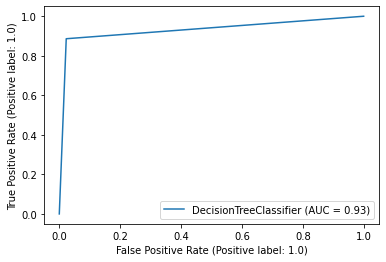

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dtc.predict(X_test) 

# Computing the test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dtc, X_test, y_test)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train) # Fit dt to the training set
importance = dt.feature_importances_
# pyplot.bar([x for x in range(len(importance))], importance) just in case if needed
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, 'creation'),
 (1.0, 'last_session_creation_time'),
 (0.0, 'opted_in_to_mailing_list'),
 (0.0, 'enabled_for_marketing_drip'),
 (0.0, 'org_id'),
 (0.0, 'invited_by_user_id')]

**Conclusion**

**After performing all the necesssary steps of the above datas  we  found that Decission Tree is the only successfull machine learning model with the "area under curve - receiver operator characterstics" (AUROC) value as 0.93. By this ML Model we can conclude that "last_session_creation_time" has maximum importance**